# Librairies

In [65]:
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import words


from functions import *

In [66]:
data_T = pd.read_csv("data_T.csv")

# Explore one product

In [67]:
doc = data_T["description"].sample(1)
doc = doc.values[0]
doc

'Buy De TechInn Flexible wire powered by 13 USB Led Light for Rs.219 online. De TechInn Flexible wire powered by 13 USB Led Light at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.'

## Lower the document

In [68]:
doc = doc.lower()
doc

'buy de techinn flexible wire powered by 13 usb led light for rs.219 online. de techinn flexible wire powered by 13 usb led light at best prices with free shipping & cash on delivery. only genuine products. 30 day replacement guarantee.'

## Remove the stopwords

In [69]:
stop_words = set(stopwords.words("english"))

Ebauche de la fonction de nettoyage

In [70]:
def process_text(doc, rejoin = False):
    # lower
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+") # to keep only words
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # stop words
    stop_words = set(stopwords.words("english"))
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    if rejoin :
        return " ".join(cleaned_tokens_list)
    return cleaned_tokens_list

In [71]:
tokens = process_text(doc)
display_tokens_info(tokens)

nb tokens 34, nb tokens unique 25
['buy', 'de', 'techinn', 'flexible', 'wire', 'powered', '13', 'usb', 'led', 'light']


# Working on the entire corpus

## Build raw corpus

In [72]:
# join all corpus
raw_corpus = "".join(data_T["description"].values)
raw_corpus[:1_000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [73]:
len(raw_corpus)

497512

In [74]:
# process the corpus
corpus = process_text(raw_corpus)
display_tokens_info(corpus)

nb tokens 61452, nb tokens unique 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral']


In [75]:
# value counts
tmp = pd.Series(corpus).value_counts()

In [76]:
tmp.head(5)

rs          911
products    631
free        618
delivery    567
cash        564
dtype: int64

In [77]:
tmp.tail(5)

drawerkey    1
680          1
roundbuy     1
homeehub     1
dell         1
dtype: int64

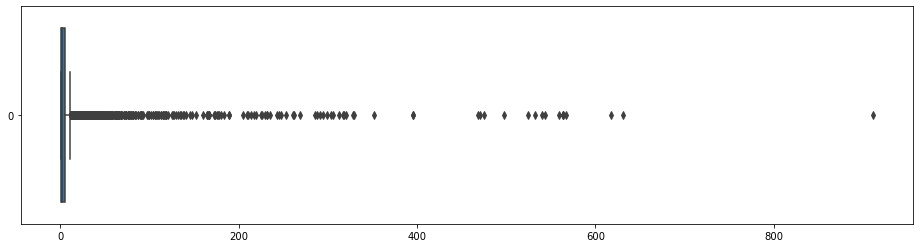

In [78]:
plt.figure(figsize=(16,4))
sns.boxplot(data = tmp, orient = "h")
plt.show()

La plupart des motsapparaissent moins de 50 fois

## Top 50 words

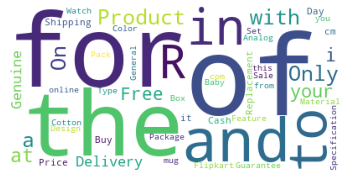

In [79]:
wordcloud = WordCloud(background_color = 'white',
                     stopwords = [],
                      collocations = False,
                     max_words = 50).generate(raw_corpus)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

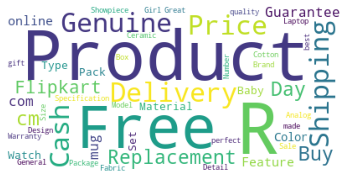

In [80]:
wordcloud = WordCloud(background_color = 'white',
                     stopwords = set(stopwords.words("english")),
                      collocations = False,
                     max_words = 50).generate(raw_corpus)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## List rare tokens

Mots n'apparaissant que très rarement et donc non utile pour la classification

In [81]:
def list_rare_tokens(corpus, nb_iter, details = False, lemm_or_stemm = None):
    '''Fonction permettant de lister et d'enregistrer cette liste des mots rares
    Option de pouvoir lemmatiser ou stemming '''
    
    if lemm_or_stemm == "lem":
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in corpus]
    elif lemm_or_stemm == "stem" :
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in corpus]
    else :
        trans_text = corpus
    tmp = pd.Series(trans_text).value_counts()
    list_nb_iter_words = tmp[tmp <= nb_iter]
    list_nb_iter_words = list(list_nb_iter_words.index)
    with open(f"min_{nb_iter}_words_{lemm_or_stemm}", "wb") as fp:   #Pickling
        pickle.dump(list_nb_iter_words, fp)
    if details :
        print(f"Number of words who appears {nb_iter} maximum after {lemm_or_stemm}")
        print(len(list_nb_iter_words))
    return list_nb_iter_words

In [82]:
list_rare_words_2_lem = list_rare_tokens(corpus,2, details = True, lemm_or_stemm = "lem")

Number of words who appears 2 maximum after lem
3190


In [83]:
list_rare_words_3 = list_rare_tokens(corpus,3, details = True)

Number of words who appears 3 maximum after None
4041


In [84]:
list_rare_words_3_stem = list_rare_tokens(corpus,3, details = True,lemm_or_stemm = "stem")

Number of words who appears 3 maximum after stem
3290


In [85]:
list_rare_words_3_lem = list_rare_tokens(corpus,3, details = True, lemm_or_stemm = "lem")

Number of words who appears 3 maximum after lem
3743


In [86]:
list_rare_words_5_stem = list_rare_tokens(corpus,5, details = True,lemm_or_stemm = "stem")

Number of words who appears 5 maximum after stem
3819


In [87]:
list_rare_words_5_lem = list_rare_tokens(corpus,5, details = True, lemm_or_stemm = "lem")

Number of words who appears 5 maximum after lem
4333


In [88]:
list_rare_words_10_lem = list_rare_tokens(corpus,10, details = True, lemm_or_stemm = "lem")

Number of words who appears 10 maximum after lem
4901


In [89]:
list_rare_words_3_lem[:10]

['cooker',
 'winger',
 'zyxel',
 'data',
 'feetz',
 'vedic',
 'allow',
 'indicator',
 'depends',
 'graph']

<br><br>

  __Ajout d'options dans la fonction de nettoyage__   
    - tag POS  
    - Garder les marques ou non  
    - ne garder que les mots anglais

In [90]:
def process_text(doc,
                 rejoin = False,
                 lemm_or_stemm = "stem",
                 list_rare_words = None,
                 tag_to_keep = None,
                 min_len_word = 3,
                 force_is_alpha = True,
                 engl_words = False,
                 keep_brands = False
                ):
    
    
    brand = brands
    if lemm_or_stemm == "lem":
        trans = WordNetLemmatizer()
        brand = [trans.lemmatize(w) for w in brand]
        
    else :
        brand = brand
    
    if not list_rare_words:
        list_rare_words = []
    else :
        if keep_brands:
            list_rare_words = [x for x in list_rare_words if x not in brand]

    # lower
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # stop words
    stop_words = set(stopwords.words("english"))
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    

    # no more len words
    more_than_N = [w for w in cleaned_tokens_list if len(w) >= min_len_word]
    
    # only alpha chars
    if force_is_alpha :
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N
    
    # tag_pos
    if tag_to_keep:
        tags = nltk.pos_tag(alpha_tokens, tagset = "universal")
        tag_to_keep_tokens = []
        for i in tag_to_keep :
            tag_to_keep_tokens.extend([w for w,pos in tags if (pos == i)])
    else :
        tag_to_keep_tokens = alpha_tokens
        
    # stem or lem
    if lemm_or_stemm == "lem":
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(w) for w in tag_to_keep_tokens]
    else :
        trans = PorterStemmer()
        trans_text = [trans.stem(w) for w in tag_to_keep_tokens]
        
    # no rare tokens
    non_rare_tokens = [w for w in trans_text if w not in list_rare_words]

        
    # In English
    if engl_words :
        eng_words = [w.lower() for w in words.words()]
        if keep_brands :
            eng_words.extend(brand)
        else : 
            eng_words = eng_words
        engl_text = [w for w in non_rare_tokens if w in eng_words]
    else :
        engl_text = trans_text
    
    # Manage return type
    if rejoin :
        return " ".join(engl_text)
    
    return engl_text

In [91]:
# Ouverture de la liste brands
with open("brands", "rb") as fp:   # Unpickling
    brands = pickle.load(fp)

In [92]:
tokens = process_text(raw_corpus,
                      lemm_or_stemm = "lem",
                      list_rare_words = "min_3_words_lem",
                      engl_words = False,
                      force_is_alpha = True,
                     tag_to_keep = None,
                     keep_brands = True)
display_tokens_info(tokens)

nb tokens 52659, nb tokens unique 4551
['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral']


__Top 50 des mots après second nettoyage__

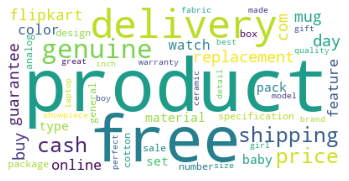

In [93]:
wordcloud_generator(tokens)

In [94]:
tokens = process_text(raw_corpus,lemm_or_stemm = "lem",list_rare_words = None)
display_tokens_info(tokens)

nb tokens 52659, nb tokens unique 4551
['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral']


In [95]:
tokens = process_text(raw_corpus,lemm_or_stemm = "lem",list_rare_words = list_rare_words_3_lem, engl_words = False)
display_tokens_info(tokens)

nb tokens 52659, nb tokens unique 4551
['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral']


In [96]:
tokens = process_text(raw_corpus,lemm_or_stemm = "lem",list_rare_words = list_rare_words_3_lem, engl_words = True)
display_tokens_info(tokens)

nb tokens 42562, nb tokens unique 1399
['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral']


In [97]:
tokens = process_text(raw_corpus,
                      lemm_or_stemm = "lem",
                      list_rare_words = list_rare_words_3_lem,
                      engl_words = True,
                      force_is_alpha = True,
                     tag_to_keep = ["NOUN","VERB"],
                     keep_brands = True)
display_tokens_info(tokens)

nb tokens 32232, nb tokens unique 1470
['feature', 'polyester', 'multicolor', 'eyelet', 'door', 'curtain', 'elegance', 'polyester', 'multicolor', 'eyelet']


__Top 50 des mots après troisième nettoyage__

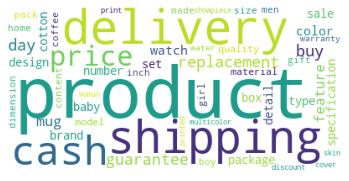

In [98]:
wordcloud_generator(tokens)

# divide corpus by category

In [99]:
categories = data_T["categ_0"].unique().tolist()
categories

['home furnishing',
 'baby care',
 'watches',
 'home decor festive needs',
 'kitchen dining',
 'beauty and personal care',
 'computers']

In [100]:
# cretation d'un corpus filtrer par catégorie
def make_corpus(data, categ):
    new_data = data[data["categ_0"]== categ]
    corpus = " ".join(new_data["description"])
    return corpus


In [101]:
# création d'un dictionnaire avec comme clé la catégorie et la valeur le corpus
d = {}
for c in categories :
    category = c.replace(" ","_")
    d["corpus_"+category] = process_text(make_corpus(data_T,c),
                                        rejoin = False,
                                        lemm_or_stemm = "lem",
                                        list_rare_words = False,
                                        engl_words = False,
                                        keep_brands = True,
                                        tag_to_keep = None)

__Top 50 des mots par catégories__

corpus_home_furnishing


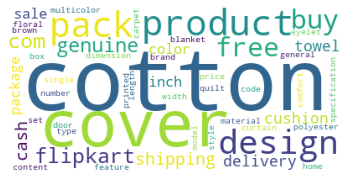

----------------------------------------

corpus_baby_care


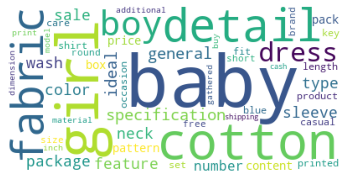

----------------------------------------

corpus_watches


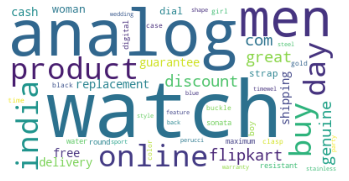

----------------------------------------

corpus_home_decor_festive_needs


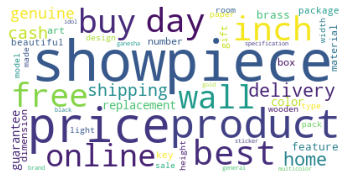

----------------------------------------

corpus_kitchen_dining


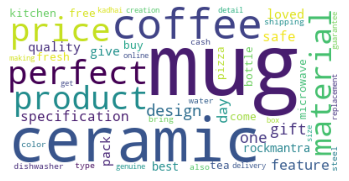

----------------------------------------

corpus_beauty_and_personal_care


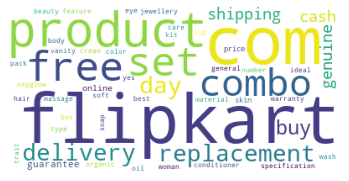

----------------------------------------

corpus_computers


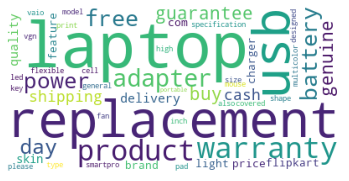

----------------------------------------



In [102]:
for k, v in d.items():
    print(k)
    wordcloud = WordCloud(background_color = 'white',
                     stopwords = [],
                    collocations = False,
                     max_words = 50).generate(" ".join(v))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    print("----------------------------------------\n")

## Find the duplicates between categories

In [103]:
def find_duplicates(dictionnary, top = "all",nb_duplicate = None):
    """ Find duplicates into values of keys in a dict
    
    positionnal arguments :
    -----------------------
    dictionnary : dict : dictionnary to analyze
    
    opt arg : 
    -----------------------
    top : int : top words in frequency to select en each values
    nb_duplicate : int : minimum keys where duplicate is present
    
    return
    -----------------------
    a liste of duplicates
    """
    
    duplicates = []
    list_top = []
    seen = set()
    if top == "all":
        for k, v in d.items():
            list_top.extend(list(pd.Series(v).value_counts().index))
    else :
        for k, v in d.items():
            list_top.extend(list(pd.Series(v).value_counts().head(top).index))
    
    
    duplicates = [x for x in list_top if x in seen or seen.add(x)]
    if nb_duplicate :
        duplicates = pd.Series(duplicates).value_counts().loc[lambda x : x >= nb_duplicate].index
        
    else :
        duplicates = duplicates
    duplicated = list(set(duplicates))

    with open(f"duplicated_{nb_duplicate}", "wb") as fp:   #Pickling
        pickle.dump(duplicated, fp)
    
    return duplicated 

In [104]:
# Nombre de duplicatas présent dans toutes les catégories
duplicated_all = find_duplicates(d, top = "all",nb_duplicate = 6)
len(duplicated_all)

69

In [105]:
duplicated_all[:10]

['may',
 'design',
 'vary',
 'blue',
 'ideal',
 'one',
 'shape',
 'box',
 'flipkart',
 'content']

In [106]:
# Nombre de duplicatas présent dans 6 catégories

duplicated_5 = find_duplicates(d, top = "all",nb_duplicate = 5)
len(duplicated_5)

145

In [107]:
# Nombre de duplicatas présent dans 5 catégories

duplicated_4 = find_duplicates(d, top = "all",nb_duplicate = 4)
len(duplicated_4)

236

In [108]:
# Nombre de duplicatas présent dans 4 catégories

duplicated_3 = find_duplicates(d, top = "all",nb_duplicate = 3)
len(duplicated_3)

423

In [109]:
# Nombre de duplicatas présent dans 3 catégories

duplicated_2 = find_duplicates(d, top = "all",nb_duplicate = 2)
len(duplicated_2)

712

In [110]:
# Nombre de duplicatas présent dans 2 catégories

duplicated_1 = find_duplicates(d, top = "all",nb_duplicate = 1)
len(duplicated_1)

1335

## No extra words (duplicated in different categories)

Ajout du filtre des duplicatas par catégories

In [111]:
def process_text(doc,
                 rejoin = False,
                 lemm_or_stemm = None,
                 list_rare_words = None,
                 tag_to_keep = None,
                 min_len_word = 3,
                 force_is_alpha = True,
                 engl_words = False,
                 keep_brands = False,
                 extra_words = None):
    
    brand = brands
    if lemm_or_stemm == "lem":
        trans = WordNetLemmatizer()
        brand = [trans.lemmatize(w) for w in brand]
    else :
        brand = brand
    
    if not list_rare_words:
        list_rare_words = []
    else :
        if keep_brands:
            list_rare_words = [x for x in list_rare_words if x not in brands]

    # lower
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # stop words
    stop_words = set(stopwords.words("english"))
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    

    # no more len words
    more_than_N = [w for w in cleaned_tokens_list if len(w) >= min_len_word]
    
    # only alpha chars
    if force_is_alpha :
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N
    
    # tag_pos
    if tag_to_keep:
        tags = nltk.pos_tag(alpha_tokens, tagset = "universal")
        tag_to_keep_tokens = []
        for i in tag_to_keep :
            tag_to_keep_tokens.extend([w for w,pos in tags if (pos == i)])
    else :
        tag_to_keep_tokens = alpha_tokens
        
    # stem or lem
    if lemm_or_stemm == "lem":
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(w) for w in tag_to_keep_tokens]
    else :
        trans = PorterStemmer()
        trans_text = [trans.stem(w) for w in tag_to_keep_tokens]
        
    # no rare tokens
    non_rare_tokens = [w for w in trans_text if w not in list_rare_words]

        
    # In English
    if engl_words :
        eng_words = [w.lower() for w in words.words()]
        if keep_brands :
            eng_words.extend(brands)
        else : 
            eng_words = eng_words
        engl_text = [w for w in non_rare_tokens if w in eng_words]
    else :
        engl_text = trans_text
    
    # drop extra words tokens
    final = [w for w in engl_text if w not in extra_words]
        
    # Manage return type
    if rejoin :
        return " ".join(final)
    
    return final

In [112]:
corpus = process_text(raw_corpus,
                              rejoin = False,
                              lemm_or_stemm = "lem",
                              list_rare_words = list_rare_words_3_lem,
                              tag_to_keep = ["NOUN","VERB"],
                              engl_words = True,
                              keep_brands  = True,
                             extra_words = duplicated_5)

In [113]:
display_tokens_info(corpus)

nb tokens 17651, nb tokens unique 1345
['polyester', 'eyelet', 'door', 'curtain', 'elegance', 'polyester', 'eyelet', 'door', 'curtain', 'curtain']


__Top 50 des mots après nettoyage final__

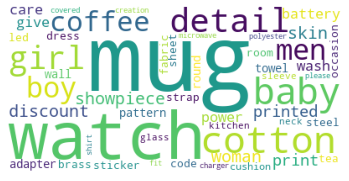

In [114]:
wordcloud_generator(corpus)

# Final clean

Ajout d'une option permettant de ne pas garder les duplicatas au sein de chaque description

In [115]:
def process_text(doc,
                 rejoin=False,
                 lemm_or_stemm=None,
                 list_rare_words=None,
                 tag_to_keep=None,
                 min_len_word=3,
                 force_is_alpha=True,
                 engl_words=False,
                 keep_brands=False,
                 extra_words=None,
                 no_duplicate=False):
    
    
    brand = brands
    if lemm_or_stemm == "lem":
        trans = WordNetLemmatizer()
        brand = [trans.lemmatize(w) for w in brand]
    
    if not list_rare_words:
        list_rare_words = []
    else:
        if keep_brands:
            list_rare_words = [x for x in list_rare_words if x not in brand]

    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)

    # stop words
    stop_words = set(stopwords.words("english"))
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    # no more len words
    more_than_N = [w for w in cleaned_tokens_list if len(w) >= min_len_word]

    # only alpha chars
    if force_is_alpha:
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else:
        alpha_tokens = more_than_N

    # tag_pos
    if tag_to_keep:
        tags = nltk.pos_tag(alpha_tokens, tagset="universal")
        tag_to_keep_tokens = []
        for i in tag_to_keep:
            tag_to_keep_tokens.extend([w for w, pos in tags if (pos == i)])
    else:
        tag_to_keep_tokens = alpha_tokens

    # stem or lem
    if lemm_or_stemm == "lem":
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(w) for w in tag_to_keep_tokens]
    elif lemm_or_stemm == "stem":
        trans = PorterStemmer()
        trans_text = [trans.stem(w) for w in tag_to_keep_tokens]
    else:
        trans_text = tag_to_keep_tokens
    # no rare tokens
    non_rare_tokens = [w for w in trans_text if w not in list_rare_words]

    # In English
    if engl_words:
        eng_words = [w.lower() for w in words.words()]
        if keep_brands:
            eng_words.extend(brand)
        else:
            eng_words = eng_words
        engl_text = [w for w in non_rare_tokens if w in eng_words]
    else:
        engl_text = non_rare_tokens

    # drop extra words tokens
    if extra_words:
        no_extra_words = [w for w in engl_text if w not in extra_words]
    else:
        no_extra_words = engl_text

    # remove duplicates
    if no_duplicate:
        final = list(set(no_extra_words))
    else:
        final = no_extra_words

    # Manage return type
    if rejoin:
        return " ".join(final)

    return final

In [116]:
data_final = data_T[["categ_0","description"]]

In [117]:
params= {
    "lemm_or_stemm": ["lem", "stem", None],
    "list_rare_words": [list_rare_words_3, list_rare_words_3_lem, list_rare_words_5_lem],
    "tag_to_keep": [None, ["NOUN"],["NOUN", "VERB"]],
    "min_len_words": [2,3],
    "force_is_alpha" : [True, False],
    "engl_words": [True, False],
    "keep_brands": [True, False],
    "extra_words":[None, duplicated_all, duplicated_5, duplicated_4],
    "no_duplicate": [True, False]                
}

In [118]:
def final_clean(doc):
    new_doc = process_text(doc,
                           rejoin=True,
                           lemm_or_stemm="lem",
                           list_rare_words=None,
                           tag_to_keep=None,
                           min_len_word=3,
                           force_is_alpha=True,
                           engl_words=False,
                           keep_brands=True,
                           extra_words=duplicated_5,
                           no_duplicate=False)
    return new_doc

In [119]:
data_final["description_clean"] = data_final["description"].apply(final_clean)

## Analyze if items have no description

In [120]:
blank = data_final[data_final["description_clean"]==""]

In [121]:
print("Number of items without clean descritpion : ", len(blank))
categories = data_final["categ_0"].unique().tolist()
for cat in categories:
    print(cat)
    print("-------------------------------------------------")
    sample = blank[blank["categ_0"] == cat]
    for idx, ser in sample.iterrows():
        print(idx)
        print(ser["description"], "\n")
        print(ser["description_clean"], "\n")
        print("----------------------------------------------------------")

Number of items without clean descritpion :  0
home furnishing
-------------------------------------------------
baby care
-------------------------------------------------
watches
-------------------------------------------------
home decor festive needs
-------------------------------------------------
kitchen dining
-------------------------------------------------
beauty and personal care
-------------------------------------------------
computers
-------------------------------------------------


## Example of cleaning in each categories

In [122]:
categories = data_final["categ_0"].unique().tolist()
for cat in categories:
    print(cat)
    print("-------------------------------------------------")
    sample = data_final[data_final["categ_0"] == cat].sample(2)
    for idx, ser in sample.iterrows():
        print(ser["description"], "\n")
        print(ser["description_clean"], "\n")
        print("----------------------------------------------------------")

home furnishing
-------------------------------------------------
Specifications of Tidy Green Cotton Kitchen Linen Set (Pack of 3) General Brand Tidy Design Code RMHG Material Cotton Style Code RMHG323 Design Printed Glove Color Green Dimensions Weight 200 g Additional Features Fabric Care Gentle Wash In the Box Number of Contents in Sales Package Pack of 3 Sales Package Hand Glove 2Pcs, Pot Holder 1Piece 

tidy cotton kitchen linen tidy code rmhg cotton code printed glove fabric care gentle wash glove pot holder 

----------------------------------------------------------
Hargunz Polyester Brown, White Motif Eyelet Long Door Curtain (275 cm in Height, Pack of 2)
                         Price: Rs. 656
				
			Stiching Eyelet style with metal ring. Anti wrinkle,Anti-shrinkage, Color fastness, 100% Polyester, Quality fabric,Sober as well as lively colors,Varied patterns,Elegant Design Size:4 ft x 9 ft
Stiching Eyelet style with metal ring. Anti wrinkle,Anti-shrinkage, Color fastness, 1

In [123]:
data_final.to_csv("data_final.csv", index = False)